## EDA Stage of The Pursuit of Happiness: Exploring the DALI_Data-Anon data
### Logan Chang
### DALI Lab Coding Challenge

In this notebook, I explore the DALI_Data-Anon data for my application to the DALI Lab. I examine the core data on its own and then begin to move towards my goal: looking for data relationships to happiness and eventually building a model that can predict a person's happiness based on the supplied data. Through a variety of analytical and visual techniques, I dive deeply into determing the feature relationships to happiness and pre-processing the data for eventual machine learning classification.

## 1. Loading and setting up the data

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#get our data
df = pd.read_csv('/Users/logan/Desktop/DALI/DALI_Data-Anon.csv')
df.head()

,year,gender,heightInches,happiness,stressed,sleepPerNight,socialDinnerPerWeek,alcoholDrinksPerWeek,caffeineRating,affiliated,numOfLanguages,gymPerWeek,hoursOnScreen,phoneType
0,'19,Female,63.0,4,2,7,3.0,4.0,1,1,2,3.0,6.0,iOS
1,'19,Male,71.0,4,5,7,3.0,8.0,6,1,2,4.0,6.0,iOS
2,'19,Female,63.0,4,4,7,3.0,2.0,1,1,1,0.0,9.0,Other
3,'19,Male,70.0,4,5,7,7.0,7.0,8,1,1,3.0,7.0,Android
4,'19,Male,70.0,4,8,7,3.0,3.0,3,1,2,5.0,6.0,iOS


### Previewing our data:

In [3]:
#columns
df.columns

Index(['year', 'gender', 'heightInches', 'happiness', 'stressed',
       'sleepPerNight', 'socialDinnerPerWeek', 'alcoholDrinksPerWeek',
       'caffeineRating', 'affiliated', 'numOfLanguages', 'gymPerWeek',
       'hoursOnScreen', 'phoneType'],
      dtype='object')

In [4]:
#general overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
year                    66 non-null object
gender                  66 non-null object
heightInches            65 non-null float64
happiness               66 non-null int64
stressed                66 non-null int64
sleepPerNight           66 non-null int64
socialDinnerPerWeek     65 non-null float64
alcoholDrinksPerWeek    63 non-null float64
caffeineRating          66 non-null int64
affiliated              66 non-null int64
numOfLanguages          66 non-null int64
gymPerWeek              65 non-null float64
hoursOnScreen           65 non-null float64
phoneType               66 non-null object
dtypes: float64(5), int64(6), object(3)
memory usage: 7.3+ KB


We are missing values for socialDinnerPerWeek, alcoholDrinksPerWeek, gymPerWeek, and hoursOnScreen. We'll circle back to handling these later. Thankfully, missing data isn't too prevalent.

*'affiliated'* is listed as an int type column, but it's really just a binary set of 0's and 1's to denote affiliated or not. Let's change this so it's not included in our analysis of quantitative data: 

In [5]:
def affiliated_switch(i):
    if i == 0:
        return 'N'
    return 'Y'
df['affiliated'] = df['affiliated'].apply(lambda x: affiliated_switch(x))
df.head()

,year,gender,heightInches,happiness,stressed,sleepPerNight,socialDinnerPerWeek,alcoholDrinksPerWeek,caffeineRating,affiliated,numOfLanguages,gymPerWeek,hoursOnScreen,phoneType
0,'19,Female,63.0,4,2,7,3.0,4.0,1,Y,2,3.0,6.0,iOS
1,'19,Male,71.0,4,5,7,3.0,8.0,6,Y,2,4.0,6.0,iOS
2,'19,Female,63.0,4,4,7,3.0,2.0,1,Y,1,0.0,9.0,Other
3,'19,Male,70.0,4,5,7,7.0,7.0,8,Y,1,3.0,7.0,Android
4,'19,Male,70.0,4,8,7,3.0,3.0,3,Y,2,5.0,6.0,iOS


In [6]:
#some stats on quantitative variables (though some of these are categorical with numerical values)
df.describe()

,heightInches,happiness,stressed,sleepPerNight,socialDinnerPerWeek,alcoholDrinksPerWeek,caffeineRating,numOfLanguages,gymPerWeek,hoursOnScreen
count,65.000000,66.000000,66.000000,66.000000,65.000000,63.000000,66.000000,66.000000,65.000000,65.000000
mean,66.153846,3.939394,5.333333,6.893939,3.923077,4.380952,4.136364,1.863636,3.184615,7.307692
std,2.873536,0.720658,2.114662,0.879314,1.881719,3.634195,3.067880,0.839164,1.927533,2.377782
min,61.000000,2.000000,1.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000
25%,64.000000,4.000000,3.250000,6.000000,3.000000,1.500000,1.000000,1.000000,2.000000,6.000000
50%,66.000000,4.000000,6.000000,7.000000,4.000000,4.000000,3.000000,2.000000,3.000000,7.000000
75%,68.000000,4.000000,7.000000,7.000000,5.000000,6.500000,6.000000,2.000000,5.000000,8.000000
max,72.000000,5.000000,10.000000,9.000000,7.000000,15.000000,10.000000,4.000000,7.000000,15.000000


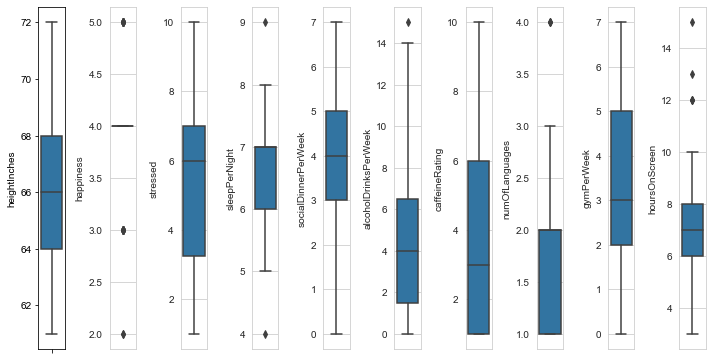

In [7]:
l = df.columns.values
number_of_columns= 10
number_of_rows = len(l)-1/number_of_columns
fig = plt.figure(figsize=(number_of_columns,5*number_of_rows))
col_pos = 1
for i in range(0,len(l)):
    column_name = list(df.columns)[i]
    if df[column_name].dtype == object:
        continue
    plt.subplot(number_of_rows+1,number_of_columns, col_pos)
    col_pos += 1
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],orient='v')
    plt.tight_layout()

#### Quick Obersvations:
* Happiness data is pretty "clumped"; the 25th to 75th percentile of all respondants happiness level was a 4
* Stress data has a broad range (1-10), but is skewed more heavily toward the higher side of the scale with 50% of those in the data set having a stress level of 6 or more
* The majority of outliers are "large" outliers in magnitude (alcoholic drinks per week, hours on screen, number of known languages); these outliers are greater than what is considered normal via IQR. Hours on Screen has many outliers, showing a wide distribution of that data

A general obsersvation is that those in the data set live pretty healthy lifestyles. Though many are stressed, very few are getting less than 6 hours of sleep per nights, most are having at least 3 social dinners per week, consuming alcohol in moderation throughout the week (typically between 2 and 6 drinks per week), and getting around 3 hours of gym time per week. Screen time is also consistent with my own screen time (about 8 hours a day when there isn't Zoom classes).

In [8]:
#qualitative stats
df.describe(include = 'O')

,year,gender,affiliated,phoneType
count,66,66,66,66
unique,4,3,2,3
top,'19,Female,Y,iOS
freq,24,40,37,56


In [9]:
#see the different values for "year"
df.year.unique()

array(["'19", "'20", "'21", "'22"], dtype=object)

From our qualitative data, we can discern:

* The majority of those in the dataset were 19's and it seems like they were seniors at the time. Perhaps, seniors at the time were very stressed about life after college, finishing classes, etc. and that contributed to the higher levels of stress throughout the dataset
* ~60% of those in the dataset were female
* A little more than half (56%) of those in the dataset are affiliated
* Most use iPhones (iOS)

### We are primiarly concered with the happiness levels of our data subjects. Lets dive into that deeper here:

In [10]:
df['happiness'].describe()

count    66.000000
mean      3.939394
std       0.720658
min       2.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: happiness, dtype: float64

Happiness data is presumptively on a 1-10 scale like *'stressed'* is, so seems like DALI students aren't too happy :(

Thankfully, no one's happiness is below 2, so at least there is some semblance of happiness within the group!

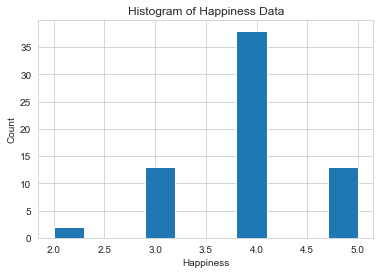

In [11]:
#histogram
plt.hist(df['happiness'])
plt.title('Histogram of Happiness Data')
plt.xlabel('Happiness')
plt.ylabel('Count')
plt.show()

We see a couple things here:

* Close-ish to normal distribution
* Slight negative skewdness with the one *2* happiness
* Definite peakedness

It could be worthwhile to remove the *2* value from our dataset when training our model since it is a bit of an outlier, but it shouldn't change our model too much.

In [12]:
#skew and kurt
print("Skewness: %f" % df['happiness'].skew())
print("Kurtosis: %f" % df['happiness'].kurt())

Skewness: -0.417439
Kurtosis: 0.288713


* Small skewness would suggest our data is near-symmetric
* Low kurotsis means we have few outliers

## 2. Relationships between Happiness and Features

#### First, let's take a look at our numeric variables:

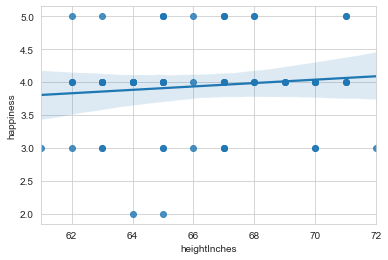

In [13]:
#scatter for heightInches/happiness
var = 'heightInches'
# data = pd.concat([df['happiness'], df[var]], axis=1)
# data.plot.scatter(x=var, y='happiness', ylim=(1,6))
sns.regplot(x=var, y="happiness", data=df[[var, 'happiness']])

Safe to say that there appears to be a very weak, non-existent realtionship between height and happiness. We probably won't be including height in our model features then.

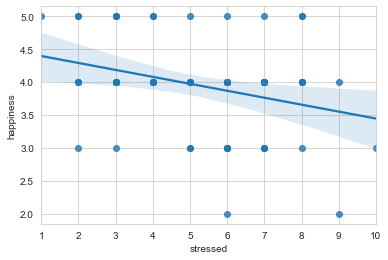

In [14]:
#scatter for stressed/happiness
var = 'stressed'
# data = pd.concat([df['happiness'], df[var]], axis=1)
# data.plot.scatter(x=var, y='happiness', ylim=(1,6))
sns.regplot(x=var, y="happiness", data=df[[var, 'happiness']])

We can see a slight inverse relationship between stress and happiness (as to be expected). Although, the relationship doesn't appear to be overwhelming

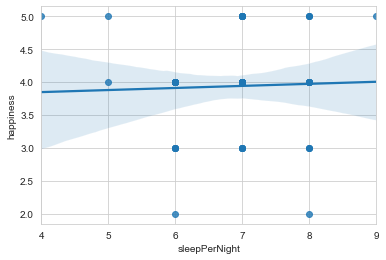

In [15]:
#scatter for sleepPerNight/happiness
var = 'sleepPerNight'
# data = pd.concat([df['happiness'], df[var]], axis=1)
# data.plot.scatter(x=var, y='happiness', ylim=(1,6))
sns.regplot(x=var, y="happiness", data=df[[var, 'happiness']])

Nothing particularly strong here either. Logically, we would assume increased sleep per night would relate to more happiness (right?), but any positive correlation here isn't too strong.

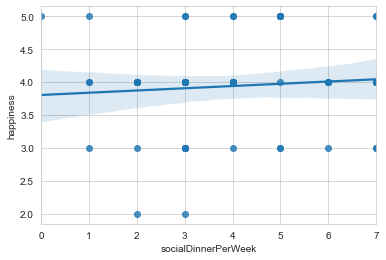

In [16]:
#scatter for socialDinnerPerWeek/happiness
var = 'socialDinnerPerWeek'
# data = pd.concat([df['happiness'], df[var]], axis=1)
# data.plot.scatter(x=var, y='happiness', ylim=(1,6))
sns.regplot(x=var, y="happiness", data=df[[var, 'happiness']])

This distribution is very similar to what we saw with sleep per night. This is consistent with assumptions of similar effects of the two on happiness.

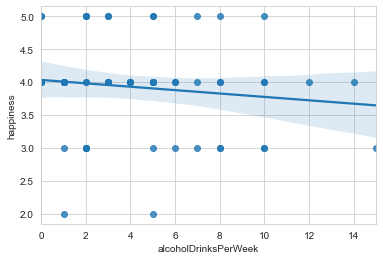

In [17]:
#scatter for alcoholDrinksPerWeek/happiness
var = 'alcoholDrinksPerWeek'
# data = pd.concat([df['happiness'], df[var]], axis=1)
# data.plot.scatter(x=var, y='happiness', ylim=(1,6))
sns.regplot(x=var, y="happiness", data=df[[var, 'happiness']])

No strong correlation here either. I would've assumed more of a "bell curve" like shape, but data here would suggest even a slight inverse relationship (which also makes sense).

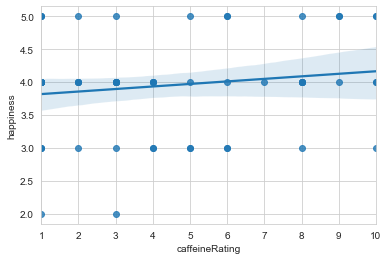

In [18]:
#scatter for caffeineRating/happiness
var = 'caffeineRating'
# data = pd.concat([df['happiness'], df[var]], axis=1)
# data.plot.scatter(x=var, y='happiness', ylim=(1,6))
sns.regplot(x=var, y="happiness", data=df[[var, 'happiness']])

Caffeine intake seems to have a slight linear realtionship with happiness. I wasn't sure what to expect here, so this is interesting to see.

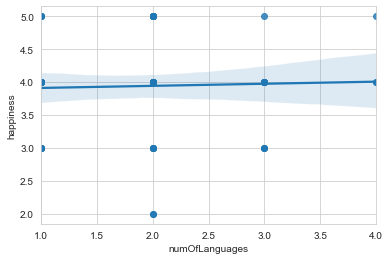

In [19]:
#scatter for numOfLanguages/happiness
var = 'numOfLanguages'
# data = pd.concat([df['happiness'], df[var]], axis=1)
# data.plot.scatter(x=var, y='happiness', ylim=(1,6))
sns.regplot(x=var, y="happiness", data=df[[var, 'happiness']])

I didn't expect number of known languages to correlate too strongly with happiness and the data affirms this assumption. We likely won't need this feature going forward.

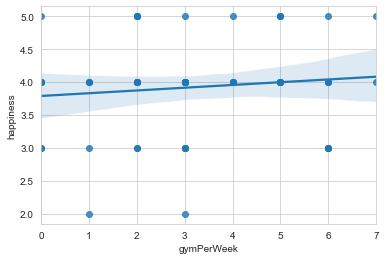

In [20]:
#scatter for gymPerWeek/happiness
var = 'gymPerWeek'
# data = pd.concat([df['happiness'], df[var]], axis=1)
# data.plot.scatter(x=var, y='happiness', ylim=(1,6))
sns.regplot(x=var, y="happiness", data=df[[var, 'happiness']])

Gym hours per week seem to have a slight positive correlation to happiness, though not a strong correaltion at all.

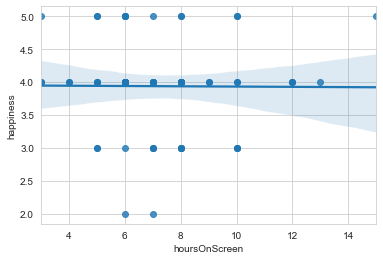

In [21]:
#scatter for hoursOnScreen/happiness
var = 'hoursOnScreen'
# data = pd.concat([df['happiness'], df[var]], axis=1)
# data.plot.scatter(x=var, y='happiness', ylim=(1,6))
sns.regplot(x=var, y="happiness", data=df[[var, 'happiness']])

There seems to be a slight positive correlation between screen time and happiness. This is a pretty subjective relationship to try to predict, so the data is quite insightful here.

#### Turning now to our categorical data:

(-0.5, 2.5, 1.0, 6.0)

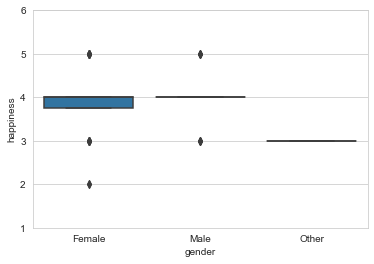

In [22]:
#box plot gender/happiness
var = 'gender'
data = pd.concat([df['happiness'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x=var, y="happiness", data=data)
fig.axis(ymin=1, ymax=6)

Though there is greater variance amongst females, males and females seem to have similar levels of happiness. It doesn't seem apparent that gender has an effect on happiness, but we will keep it in our feature model.

(-0.5, 1.5, 1.0, 6.0)

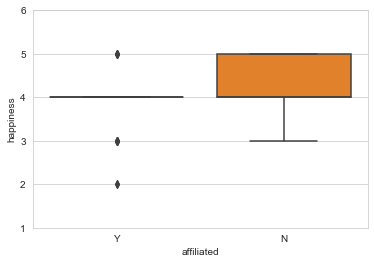

In [23]:
#box plot affiliated/happiness
var = 'affiliated'
data = pd.concat([df['happiness'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x=var, y="happiness", data=data)
fig.axis(ymin=1, ymax=6)

In [24]:
df.affiliated.value_counts()

Y    37
N    29
Name: affiliated, dtype: int64

There is less of a variance of happiness among those who aren't affiliated versus those that are. In fact, there is no outlier data in the happiness levels of those that aren't affiliated. Median levels of happiness between the two groups was about equivalent.

(-0.5, 2.5, 1.0, 6.0)

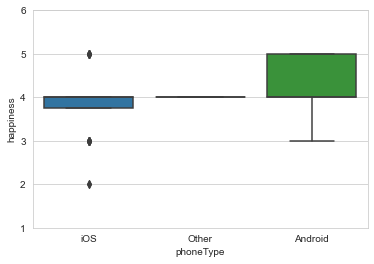

In [25]:
#box plot phoneType/happiness
var = 'phoneType'
data = pd.concat([df['happiness'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x=var, y="happiness", data=data)
fig.axis(ymin=1, ymax=6)

In [26]:
df.phoneType.value_counts()

iOS        56
Android     9
Other       1
Name: phoneType, dtype: int64

Regardless of phone type, all 3 groups had realtively similar median levls of happiness (~4/10). Android data was much more compact than iOS (thanks to far less people using Android) and very few people used 'Other' types of phones (just one person, actually)

### Summary:

From this quick analysis, we can conclude:

* There isn't a glaringly evident relationship between happiness and any other feature. 
* If we had to pinpoint a few variables that could have be related to happiness, I've previously noted the slight evidence of realtionships between stress, hours on screen, affiliation, gym time, and alcoholic drinks per week.

## 3. Univariate Correlations

Let's look at a correlation matrix to determine the univariate correaltions between each feature. In particular, pay close attention to the happiness row/column to see the most and least correlated features:

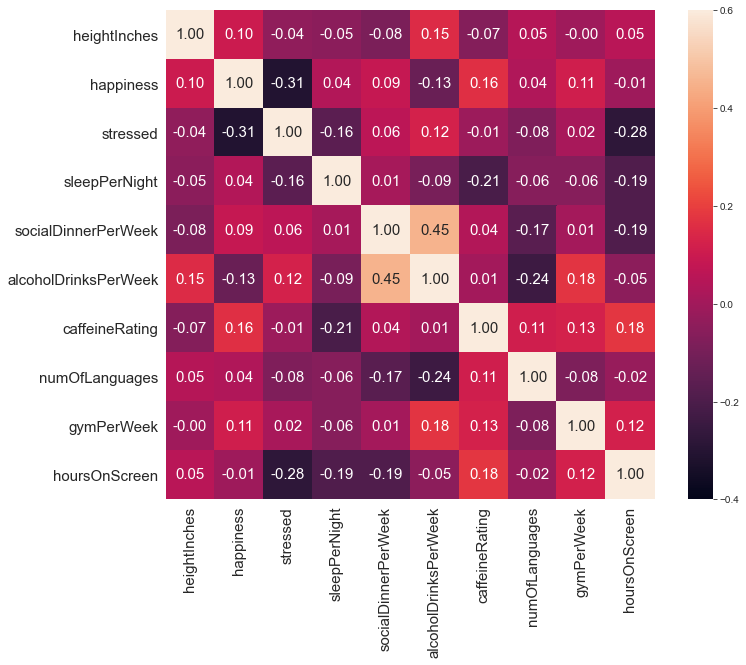

In [27]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
hmap = sns.heatmap(corrmat, vmax = 0.6, vmin = -0.4, square=True, annot = True, fmt = '.2f', annot_kws={"size":15})
hmap.set_xticklabels(hmap.get_xmajorticklabels(), fontsize = 15)
hmap.set_yticklabels(hmap.get_ymajorticklabels(), fontsize = 15)
plt.show()

In [28]:
#list view of correlations
print("Find most important features relative to target (according to abs. value of Pearson correlation)")
corr_abs = abs(corrmat)
corr_abs.sort_values(["happiness"], ascending = False, inplace = True)
print(corr_abs.happiness)

Find most important features relative to target (according to abs. value of Pearson correlation)
happiness               1.000000
stressed                0.309587
caffeineRating          0.163842
alcoholDrinksPerWeek    0.129107
gymPerWeek              0.112679
heightInches            0.101944
socialDinnerPerWeek     0.087953
sleepPerNight           0.038256
numOfLanguages          0.037003
hoursOnScreen           0.006960
Name: happiness, dtype: float64


#### Takeaways:

* With realtion to happiness, none of the variables exhibit a strong correaltion to happiness
* Stress had the strongest correlation value (although negatively correlated), followed by caffeine intake, affiliation status, and alcoholic drinks per week
* Across all our data, the strongest correaltions were found between alocholic drinks and affiliation status, alcholic drinks and social dinners, social dinners and affiliation status, screen time and stress, and amount of sleep and caffeine intake. None of these should be too surprising.

#### Let's look at happiness and its 5 most correlated variables a little more closely:

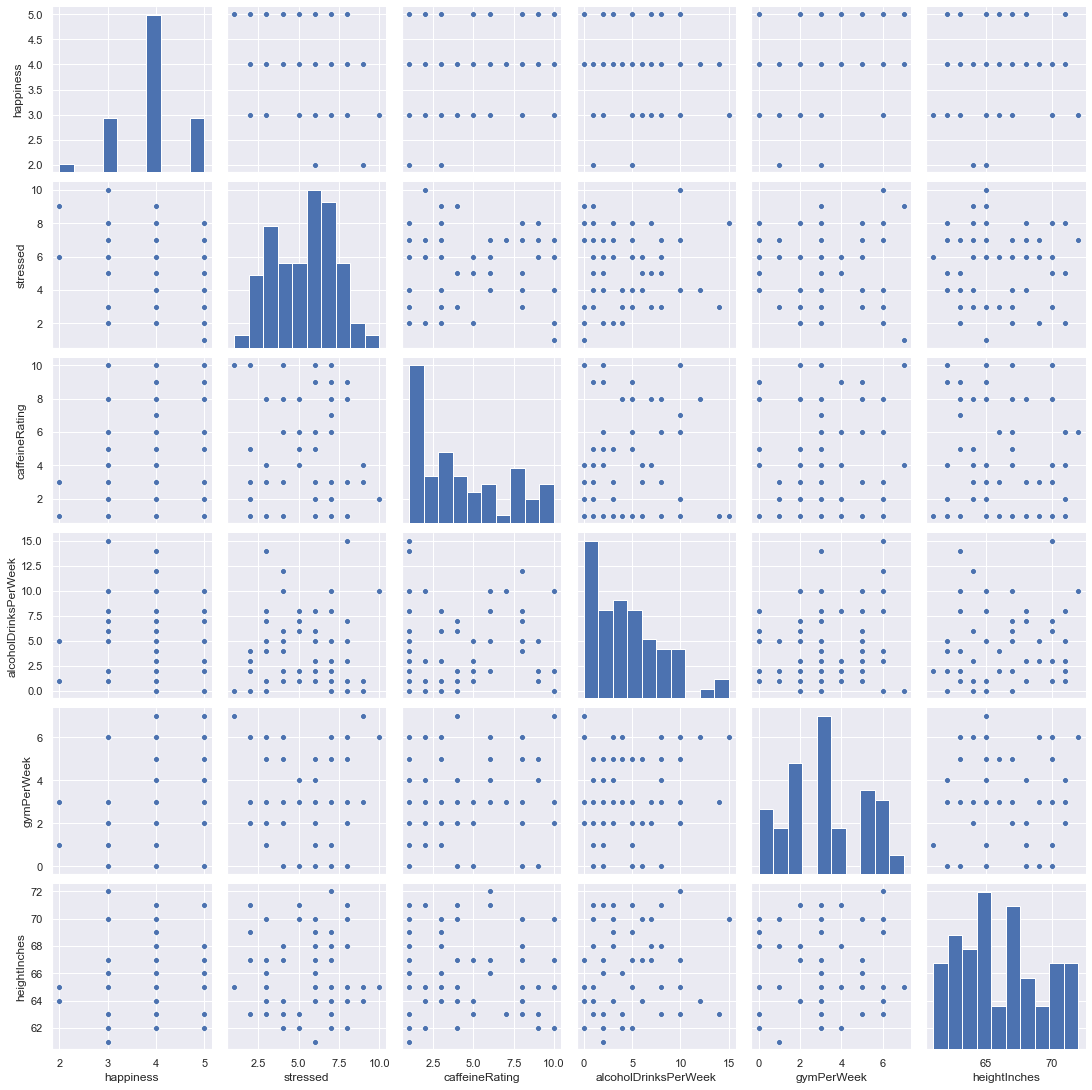

In [29]:
#scatter plots between happiness and its 5 most correlated variables
sns.set()
cols = ['happiness', 'stressed', 'caffeineRating', 'alcoholDrinksPerWeek', 'gymPerWeek', 'heightInches']
sns.pairplot(df[cols], size = 2.5)
plt.show();

Much like the rest of our data, the relationships between each pair of these variables are weak and look fairly random at best.

One trend I noticed was in the *'alcoholDrinksPerWeek'* and *'caffeineRating'* scatterplot, with the majority of data points clustered in the lower-left corner. The majority of students in the data set aren't drinking a lot of alcohol each week and are taking in realtively small amount of caffeine as well. The statement that the more alcoholic drinks a student has per week means the same student consumes less caffeine on average could also be substantiated by this particular plot. 

If we also turn out attention to *'stressed'* and *'caffeineRating'*, we can see a downward-sloping band of data points. This would seem to suggest that stress generally decreases as cafffeine intake increases. Logically, I can't think of a reason that would suggest this relationship, so this could just be coincidence. However, I thought it was worthwhile to note.

## 4. Missing Data

In [30]:
#overview of missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(14)

,Total,Percent
alcoholDrinksPerWeek,3,0.045455
hoursOnScreen,1,0.015152
gymPerWeek,1,0.015152
socialDinnerPerWeek,1,0.015152
heightInches,1,0.015152
phoneType,0,0.000000
numOfLanguages,0,0.000000
affiliated,0,0.000000
caffeineRating,0,0.000000
sleepPerNight,0,0.000000


In [31]:
#a closer look at which entries are missing data
null_data = df[df.isnull().any(axis=1)]
null_data

,year,gender,heightInches,happiness,stressed,sleepPerNight,socialDinnerPerWeek,alcoholDrinksPerWeek,caffeineRating,affiliated,numOfLanguages,gymPerWeek,hoursOnScreen,phoneType
25,'20,Female,65.0,4,6,7,NaN,NaN,2,N,3,4.0,NaN,iOS
33,'20,Male,NaN,4,7,6,4.0,1.0,2,N,2,1.0,7.0,Android
48,'21,Male,66.0,5,3,7,3.0,NaN,3,N,2,NaN,8.0,Android
65,'22,Male,70.0,4,6,5,2.0,NaN,10,N,2,3.0,10.0,iOS


For the missing height entry, it'll be safe to assume this 20 Male is of average male height from within the dataset.

For the other missing entries, I am going to assume a NaN value corresponds to an entry of '0' that wasn't input.

In [32]:
#filling missing height entry
df_male = df.loc[df.gender == 'Male']
avg_male_height = df_male.heightInches.mean()
print(avg_male_height)
df.fillna({'heightInches': avg_male_height}, inplace = True)

68.25


In [33]:
df.fillna(0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
year                    66 non-null object
gender                  66 non-null object
heightInches            66 non-null float64
happiness               66 non-null int64
stressed                66 non-null int64
sleepPerNight           66 non-null int64
socialDinnerPerWeek     66 non-null float64
alcoholDrinksPerWeek    66 non-null float64
caffeineRating          66 non-null int64
affiliated              66 non-null object
numOfLanguages          66 non-null int64
gymPerWeek              66 non-null float64
hoursOnScreen           66 non-null float64
phoneType               66 non-null object
dtypes: float64(5), int64(5), object(4)
memory usage: 7.3+ KB


Great! All of our missing data is taken care of.

## 5. Looking for outliers

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [34]:
#standardizing data
happiness_scaled = StandardScaler().fit_transform(df['happiness'][:,np.newaxis])
low_range = happiness_scaled[happiness_scaled[:,0].argsort()][:10]
high_range= happiness_scaled[happiness_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.71176703]
 [-2.71176703]
 [-1.31351216]
 [-1.31351216]
 [-1.31351216]
 [-1.31351216]
 [-1.31351216]
 [-1.31351216]
 [-1.31351216]
 [-1.31351216]]

outer range (high) of the distribution:
[[1.4829976]
 [1.4829976]
 [1.4829976]
 [1.4829976]
 [1.4829976]
 [1.4829976]
 [1.4829976]
 [1.4829976]
 [1.4829976]
 [1.4829976]]


We only have two unique low values and one unqiue high value, meaning our data has a very tight distribution.

The values on both ends aren't too far from 0, so there really is no worry of outliers in the happiness data.

**Before I mentioned that possibly removing the *2* happiness value could be help make a more accurate model. Given the low distribution of the target already, it likely isn't worth taking out almost 2% of our data (1/66) for slightly less distributed data.**

#### Normality of our target

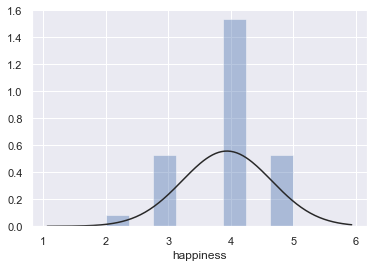

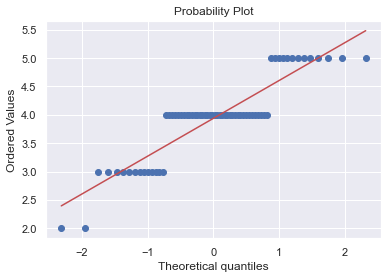

In [35]:
#histogram and normal probability plot
sns.distplot(df['happiness'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['happiness'], plot=plt)

Like previously noted, happiness data is very close to a perfect normal distribution with a slight negative skew.

The range of happiness data is so sparse, however, that observed data cannot be properly distributed among theoretical quantiles to reflect a normal distribution probability. It can be reasonably seen from the histogram and skewness measurement that happiness data is near-normally distributed. 

In [36]:
#export the dataset so we can build a model on it
df.to_csv('/Users/logan/Desktop/DALI/DALI_Data_cleaned.csv')

## 6. Conclusions
* The happiness data is close to normally distributed, has a strong peak at *4*, and has low skewdness and kurtosis. Heading into the modeling stage, I worry that model performance may be too relaint on picking *4* all the time as it is so much more common than any other possible happiness value
* The rest of the features in the dataset have very small univariate correlations to happiness. The most correlated feature to happiness (though inversely) is stress, but no feature has a univariate correlation above 0.4. This makes it difficult to expect strong results from any model
* Only a few pieces of data were missing, which was taken care of with mean or null imputation.
* With a good distribution of data and few outliers, modeling happiness shouldn't be thrown off by outlier data (at least not heavily).